<a href="https://colab.research.google.com/github/ShaikMahabunny/oasis-infobyte-tasks/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files


uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [6]:
import pandas as pd
data = pd.read_csv("IRIS.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.shape

(150, 5)

**Checking for null values:**

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
distribution = data.species.value_counts()
print(distribution)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [9]:
lab = data.species.unique().tolist()
print(lab)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


**Data Visualization:**

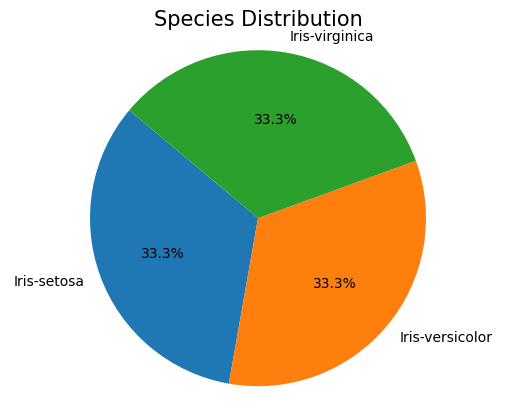

In [10]:
plt.pie(distribution, labels = lab, autopct = '%1.1f%%', startangle = 140)
plt.axis('equal')
plt.title('Species Distribution', fontsize = 15)
plt.show()

**Scatter Plot demonstrating relationship between Sepal Length and Sepal Width:**

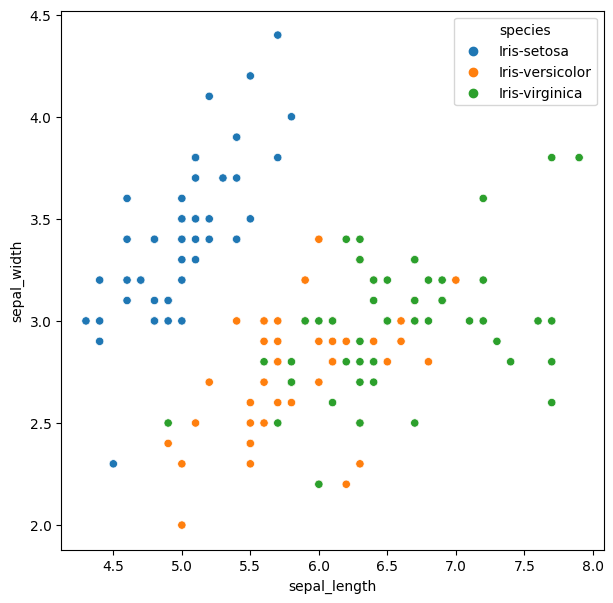

In [11]:
plt.subplots(figsize = (7, 7))
sns.scatterplot(x = "sepal_length", y = "sepal_width", data = data, hue = "species")
plt.show()

**Scatter Plot demonstrating relationship between Petal Length and Petal Width:
bold text**

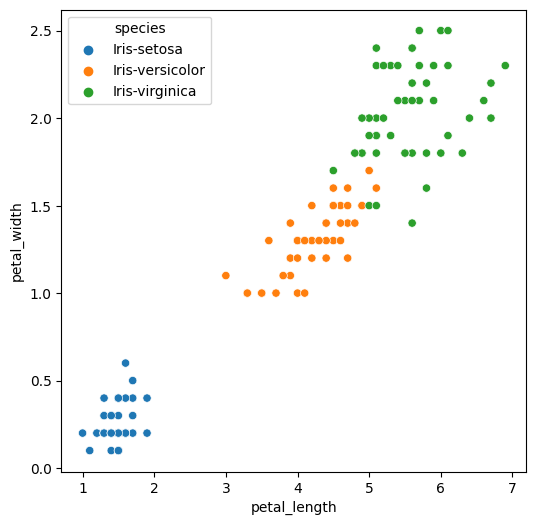

In [12]:
plt.subplots(figsize = (6,6))
sns.scatterplot(x = "petal_length", y = "petal_width", data = data, hue = "species")
plt.show()

**Relationship of features with each other:**

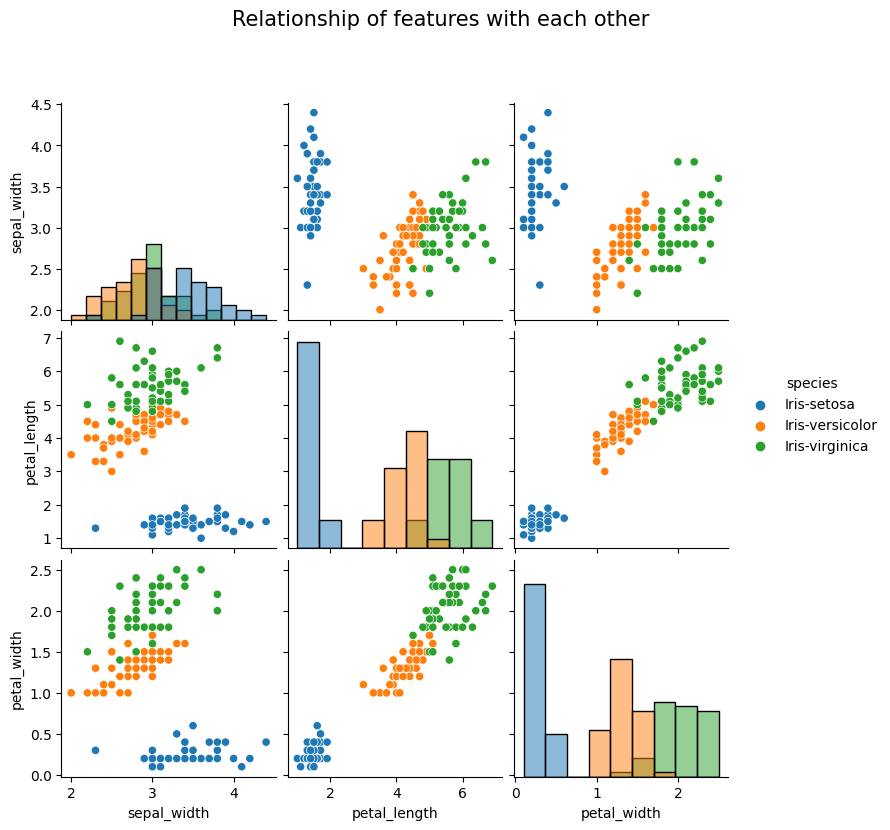

In [13]:
data1 = data.drop("sepal_length", axis = 1)
plot = sns.pairplot(data1, hue = "species", diag_kind = "hist")
plot.fig.suptitle("Relationship of features with each other", y = 1.1, fontsize = 15)
plt.show()

**Logistic Regression Model Building:**

In [14]:
from sklearn.model_selection import train_test_split
X = data.drop(["species", "sepal_length"], axis = 1)
X

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [15]:
Y = data["species"]
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
model = LogisticRegression(max_iter = 1000)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
predictions = model.predict(x_test)
print(classification_report(y_test, predictions))
print("Confusion Matrix\n", confusion_matrix(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Confusion Matrix
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [19]:
accuracy = accuracy_score(y_test,predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 95.56%
